In [2]:
import IPython.display as ipd
fname = 'arabic.wav'
ipd.Audio(fname)

In [3]:
import wave
wav = wave.open(fname)
print("Sampling rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())
Duration =  wav.getnframes()/wav.getframerate()

Sampling rate =  44100
Total samples (frames) =  2003904
Duration =  45.44


In [4]:
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ",rate )
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (2003904,)
[137 184 177 ... -77 -89 -49]


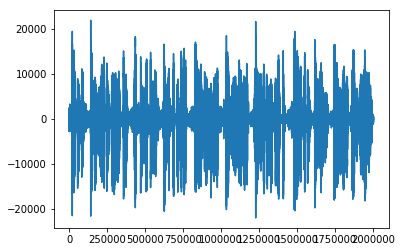

In [5]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot(data,'-')

In [6]:
from pydub import AudioSegment
newAudio = AudioSegment.from_wav("arabic.wav")
newAudio = newAudio[0:5000]
newAudio.export('arabic1.wav', format='wav')

<_io.BufferedRandom name='arabic1.wav'>

In [7]:
ipd.Audio('arabic1.wav')

Sampling (frame) rate =  44100
Total samples (frames) =  (220500,)
[137 184 177 ... 640 771 835]


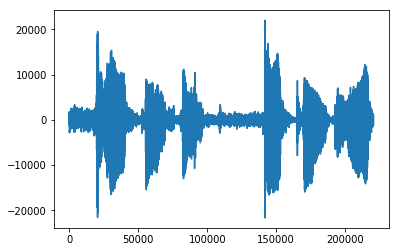

In [8]:
rate, data = wavfile.read('arabic1.wav')
print("Sampling (frame) rate = ",rate )
print("Total samples (frames) = ", data.shape)
print(data)
plt.plot(data,'-')

In [9]:
total_samples = int(Duration/5)
print("total number of wav files after 5 seconds split = ", total_samples)

total number of wav files after 5 seconds split =  9


In [16]:
file = 'arabic.wav'
basename = file.split('.')
newAudio = AudioSegment.from_wav("arabic.wav")
for i in range(total_samples):
    exportAudio = newAudio[i*5000:(i+1)*5000]
    exportAudio.export('arabic'+str(i)+'.wav', format='wav')
    
    

Sampling (frame) rate =  44100
Total samples (frames) =  (220500,)
[-10996 -10784 -10472 ...  -2003  -2805  -2637]


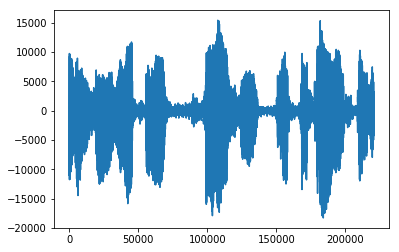

In [17]:
rate, data = wavfile.read('arabic8.wav')
print("Sampling (frame) rate = ",rate )
print("Total samples (frames) = ", data.shape)
print(data)
plt.plot(data,'-')

In [20]:
import os
path1 = '/home/pranav/Desktop/Cross_Model_Project/speech-accent-archive/wav_recordings/'
dst_path = '/home/pranav/Desktop/Cross_Model_Project/speech-accent-archive/speech_classes'
for file in os.listdir(path1):
    try:
        file = file.split('.')[0]
        file = ''.join([i for i in file if not i.isdigit()])
        os.mkdir(os.path.join(dst_path,file.split('.')[0]))
    except Exception as e:
        continue

In [21]:
count=0
for file in os.listdir(path1):
    basename = file.split('.')[0]
    basename = ''.join([i for i in basename if not i.isdigit()])
    wav = wave.open(fname)
    Duration =  wav.getnframes()/wav.getframerate()
    total_samples = int(Duration/5)
    for i in range(total_samples):
        exportAudio = newAudio[i*5000:(i+1)*5000]
        path = os.path.join(dst_path,basename)
        path = os.path.join(path,str(count)+'.wav')
        exportAudio.export(path,format='wav')
        count+=1   

In [25]:
for file in os.listdir(dst_path):
    count=0
    for audio in os.listdir(os.path.join(dst_path,file)):
        new_name = str(count)+'.wav'
        path = os.path.join(dst_path,file)
        old_path = os.path.join(path,audio)
        new_path = os.path.join(path,new_name)
        os.rename(old_path,new_path)
        count+=1